<a href="https://colab.research.google.com/github/AshikaAnand12/Company-acquisition-sentiment-analysis/blob/main/ML_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install pygooglenews

     |████████████████████████████████| 1.2 MB 7.4 MB/s 
     |████████████████████████████████| 128 kB 59.3 MB/s 
     |████████████████████████████████| 362 kB 46.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-py3-none-any.whl size=44952 sha256=44f5bb3bfeb6b7d6f63fc2fc7752228e50faed46907bd35d44b30d40befbdb6f
  Stored in directory: /root/.cache/pip/wheels/29/bf/46/b4a597d435d3aee6c2fa583824897336d65abf13ebe3405b70
Successfully built feedparser
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [4]:
pip install transformers

     |████████████████████████████████| 4.2 MB 7.2 MB/s 
     |████████████████████████████████| 596 kB 48.1 MB/s 
     |████████████████████████████████| 6.6 MB 52.0 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
pip install fast_ml==3.68

     |████████████████████████████████| 42 kB 579 kB/s 


In [6]:
pip install datasets

     |████████████████████████████████| 346 kB 8.3 MB/s 
     |████████████████████████████████| 212 kB 49.4 MB/s 
     |████████████████████████████████| 1.1 MB 56.4 MB/s 
     |████████████████████████████████| 140 kB 40.3 MB/s 
     |████████████████████████████████| 138 kB 42.6 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 64.5 MB/s 
     |████████████████████████████████| 271 kB 52.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
!pip install neattext
import neattext as ntx

     |████████████████████████████████| 114 kB 7.7 MB/s 


In [8]:
import pandas as pd
from pygooglenews import GoogleNews
import re
import nltk
import json
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import subjectivity
%matplotlib inline 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Data Preparation

In [9]:
df_crunchbase = pd.read_csv('gdrive/My Drive/Conquerors/CrunchBase/dataset.csv')


In [10]:
df_crunchbase.rename(columns={"Organization Name": "COMPANY", "Organization Name URL":"URL","Industries":"INDUSTRIES","Headquarters Location":"HEADQUARTERS","Description":"DESCRIPTION","CB Rank (Company)":"CB_RANK","Estimated Revenue Range": "REVENUE", "Total Funding Amount":"FUNDING","Total Funding Amount Currency":"IN_CURRENCY","Total Funding Amount Currency (in USD)":"FUNDING_IN_USD","IPO Status":"IPO_STATUS","Number of Acquisitions":"ACQUISITIONS", "Founders":"FOUNDERS"}, inplace=True)
df_crunchbase.head(10)

,COMPANY,URL,INDUSTRIES,HEADQUARTERS,DESCRIPTION,CB_RANK,REVENUE,FUNDING,IN_CURRENCY,FUNDING_IN_USD,IPO_STATUS,FOUNDERS,ACQUISITIONS
0,Intel,https://www.crunchbase.com/organization/intel,"Artificial Intelligence, Information Technolog...","Santa Clara, California, United States","Intel designs, manufactures, and sells integra...",1,$10B+,1.251000e+07,USD,1.251000e+07,Public,"Gordon Moore, Robert Noyce",108.0
1,Apollo,https://www.crunchbase.com/organization/apollo...,"Asset Management, Credit, Finance, Financial S...","New York, New York, United States",Apollo Global Management is an asset managemen...,2,$500M to $1B,3.994076e+08,USD,3.994076e+08,Public,"Josh Harris, Leon Black, Marc Rowan",84.0
2,NVIDIA,https://www.crunchbase.com/organization/nvidia,"Artificial Intelligence, GPU, Hardware, Softwa...","Santa Clara, California, United States","NVIDIA is a computing platform company, innova...",3,$10B+,3.500000e+07,USD,3.500000e+07,Public,"Chris Malachowsky, Curtis Priem, Jensen Huang",21.0
3,Coinbase,https://www.crunchbase.com/organization/coinbase,"Bitcoin, Blockchain, Cryptocurrency, E-Commerc...","San Francisco, California, United States",Coinbase is an online platform that allows mer...,4,$1B to $10B,5.690348e+08,USD,5.690348e+08,Public,"Brian Armstrong, Fred Ehrsam",22.0
4,WeWork,https://www.crunchbase.com/organization/wework,"Commercial Real Estate, Coworking, Property De...","New York, New York, United States",WeWork is a platform for creators that transfo...,5,$100M to $500M,2.194578e+10,USD,2.194578e+10,Public,"Adam Neumann, Miguel McKelvey, Rebekah Neumann",21.0
5,Liquidity,https://www.crunchbase.com/organization/liquid...,"Finance, Financial Services, Venture Capital","New York, New York, United States",Liquidity Capital is an investment firm that s...,6,NaN,7.950000e+08,USD,7.950000e+08,Private,"Oron Maymon, Ron Daniel, Yaron Sela",NaN
6,Nykaa,https://www.crunchbase.com/organization/nykaa,"Beauty, E-Commerce, Fashion, Lifestyle, Wellness","Mumbai, Maharashtra, India",Nykaa is an online marketplace for different b...,7,$100M to $500M,1.484586e+08,USD,1.484586e+08,Public,Falguni Nayar,5.0
7,Polygon,https://www.crunchbase.com/organization/polygo...,"Blockchain, Ethereum, Information Technology, ...","Bengaluru, Karnataka, India",Polygon is a platform for Ethereum scaling and...,8,NaN,4.504500e+08,USD,4.504500e+08,Private,"Anurag Arjun, Jaynti Kanani, Mihailo Bjelic, S...",2.0
8,Meta,https://www.crunchbase.com/organization/facebook,"Augmented Reality, Social Media, Social Networ...","Menlo Park, California, United States",Meta is a social technology company that enabl...,9,$10B+,1.612282e+10,USD,1.612282e+10,Public,"Andrew McCollum, Chris Hughes, Dustin Moskovit...",95.0
9,Lyft,https://www.crunchbase.com/organization/lyft,"Mobile Apps, Ride Sharing, Software, Transport...","San Francisco, California, United States","Lyft designs, markets, and operates a mobile a...",10,$1B to $10B,4.913607e+09,USD,4.913607e+09,Public,"John Zimmer, Logan Green, Matt Van Horn",12.0


In [11]:
company = input("Enter company of interest: ")

Enter company of interest: intel


In [12]:
print(company)

intel


In [13]:
df_crunchbase['COMPANY'] = df_crunchbase['COMPANY'].str.lower()
company = company.lower()

In [14]:
df_news = pd.DataFrame()

In [15]:
def getNews(field):
  gn = GoogleNews()
  s = gn.search(field)
  x =[None]*500
  i=0
  for entry in s['entries']:
    x[i] = entry['title']
    i+=1
  print(x)
  df_news['TITLE'] = x

In [16]:
if company in df_crunchbase['COMPANY'].values:
  index = df_crunchbase.index[df_crunchbase['COMPANY']==company].tolist()
  founders = (df_crunchbase['FOUNDERS'].iloc[index]).to_string(index=False)
  news_string = founders.replace(",", " OR").strip()
  news_string = company + ' OR ' + news_string
  getNews(news_string)
  df_news.mask(df_news.eq('None')).dropna()
else:
  print('Company not in our cruchbase list, we will only be presenting news articles related to your input')
  getNews(company)
  df_news = df_news.mask(df_news.eq('None')).dropna()

["Happy B'Day Gordon Moore: One Of The Founding Fathers Of Silicon Valley - Dazeinfo", 'Holacracy - Electronics Weekly', "Moore's Law Is Dead. Now What? - Built In", 'Happy Birthday to Gordon Moore – EEJournal - EE Journal', 'MIT titles nanoscience building in honor of AMD CEO Dr. Lisa Su - Wccftech', 'The “Traitorous Eight” and the Rise of Fairchild Semiconductor - News - All About Circuits', "Moore's law: Why Is Moore's Law in Trouble? - Interesting Engineering", "10 facts you (probably) didn't know about Intel Corp.'s 50-year history, including its founding, original name, and more - Silicon Valley Business Journal - The Business Journals", 'IEEE Robert N. Noyce Medal Awarded To AMD CEO Dr. Lisa Su For Pushing The Semiconductor Industry Forward - Wccftech', 'Ohio University and Intel: Past, present and future - Ohio University', 'A College Job and Its Impact on the Direction of Ethernet - Viodi View', 'Jay Last, One of the Rebels Who Founded Silicon Valley, Dies at 92 - The New York

In [17]:
df_news.count

<bound method DataFrame.count of                                                  TITLE
0    Happy B'Day Gordon Moore: One Of The Founding ...
1                       Holacracy - Electronics Weekly
2            Moore's Law Is Dead. Now What? - Built In
3    Happy Birthday to Gordon Moore – EEJournal - E...
4    MIT titles nanoscience building in honor of AM...
..                                                 ...
495                                               None
496                                               None
497                                               None
498                                               None
499                                               None

[500 rows x 1 columns]>

# Modeling

### Sentiment Analysis: NLTK Vader

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
def find_sentiment_score(post):
    return sia.polarity_scores(post)["compound"] 

In [20]:
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [21]:
sentiments = [None]*500
sentiment_score = [None]*500
i = 0
for post in df_news['TITLE']:
  if post!=None:
    sentiments[i] = find_sentiment(post)
    sentiment_score[i] = find_sentiment_score(post)
    i+=1
  else:
    sentiments[i] = None
    sentiment_score[i] = None
    i+=1

df_news['SENTIMENT'] = sentiments
df_news['SCORE'] = sentiment_score

In [22]:
df_news.head()

,TITLE,SENTIMENT,SCORE
0,Happy B'Day Gordon Moore: One Of The Founding ...,Positive,0.5719
1,Holacracy - Electronics Weekly,Neutral,0.0000
2,Moore's Law Is Dead. Now What? - Built In,Negative,-0.6486
3,Happy Birthday to Gordon Moore – EEJournal - E...,Positive,0.5719
4,MIT titles nanoscience building in honor of AM...,Positive,0.4939


In [23]:
max_val = df_news['SCORE'].max()
min_val = df_news['SCORE'].min()
max_title = (df_news.loc[df_news.SCORE == max_val, 'TITLE'])
min_title = (df_news.loc[df_news.SCORE == min_val, 'TITLE'])
overall_sentiment = df_news['SCORE'].mean()

# Graph

In [25]:
!pip install faker

     |████████████████████████████████| 1.5 MB 6.9 MB/s 


In [49]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
from faker import Faker
faker = Faker()
%matplotlib inline


In [64]:
graph_df = df_news[:10]
graph_df.head()

,TITLE,SENTIMENT,SCORE
0,Happy B'Day Gordon Moore: One Of The Founding ...,Positive,0.5719
1,Holacracy - Electronics Weekly,Neutral,0.0000
2,Moore's Law Is Dead. Now What? - Built In,Negative,-0.6486
3,Happy Birthday to Gordon Moore – EEJournal - E...,Positive,0.5719
4,MIT titles nanoscience building in honor of AM...,Positive,0.4939


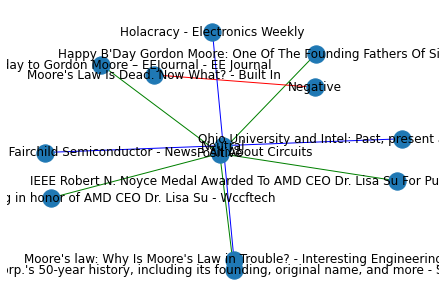

In [65]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

G = nx.Graph()
G.add_node("Positive",color='green',style='filled',fillcolor='green')
G.add_node("Negative",color='red',style='filled',fillcolor='red')
G.add_node("Neutral",color='blue',style='filled',fillcolor='blue')
for index, row in graph_df.iterrows():
      if row['SENTIMENT'] == 'Positive':
        colour = 'g'
      if row['SENTIMENT'] == 'Negative':
        colour = 'r' 
      if row['SENTIMENT'] == 'Neutral':
        colour = 'b'    
      G.add_edge(row['TITLE'],row['SENTIMENT'],color=colour)
labels = {}
pos = nx.layout.kamada_kawai_layout(G)
colors = nx.get_edge_attributes(G,'color').values()
nx.draw(G, pos=pos, edge_color=colors, with_labels= True)


# OUPUT

In [ ]:
# FOR THE OUTPUT FILE:

# Company name: company (variable)
# Company founders : founders = (df_crunchbase['FOUNDERS'].iloc[index]).to_string(index=False) - founders (variable) - handle null condition
# Graph : 
# Top positive news : max_title
# Top negative news: min_title
# overall sentiment : overall_sentiment
# Investments and acquisition from df_crunchbase

# To implement:
# Add all the above fields to an output file and generate a file
# Add comments to the file